In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
fullness_assessments = pd.read_csv("/Users/ishan/Downloads/fullness-assessments CCDS as of Oct 13 2023.csv")
scale_records = pd.read_csv("/Users/ishan/Downloads/Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv")

## Data Explanation and feature descriptions
We have two datasets:
- scale_records: Contains information related to weight measurements for bins
- fullness_assessments: Contains visual assessments of bin fullness.

Weight
- **Outliers/Errors**: min/max values of -100,000g and +100,000g suggesting outliers/errors
- **Average**: average weight is 3,965g
- **Spread**: Large variation in weight data with a SD of 7,578g

Battery Levels
- **Range:** The battery levels range from a minimum of approximately 1,334.9 to a maximum of approximately 3,251.2
- **Average:** The average battery level is approximately 2,891
- **Spread:** The variation in the battery data is relatively low, with a standard deviation of approximately 158.4

In [69]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)       # Set display width


# Display the first few rows of each dataset
print(scale_records.shape)
print(scale_records.head())
print("************************************************************************************************************************")
print(fullness_assessments.shape)
print(fullness_assessments.head())
print("************************************************************************************************************************")
# Summary statistics for the datasets
print(scale_records.describe())
print("************************************************************************************************************************")
print(fullness_assessments.describe())

(26979124, 12)
                 createdat        iotid   hide                                   bin errorcode        weight      battery                updatedat  weightdiff  year  month  day
0  2023-01-02 12:41:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2596.017395  2023-01-02 12:41:00.000         NaN  2023      1    2
1  2023-01-02 13:02:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2595.101854  2023-01-02 13:02:00.000         NaN  2023      1    2
2  2023-01-02 13:53:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2596.169986  2023-01-02 13:53:00.000         NaN  2023      1    2
3  2023-01-02 16:30:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  14100.862135  2595.559625  2023-01-02 16:30:00.000         NaN  2023      1    2
4  2023-01-02 16:39:00.000  lora-000060  False  95171614-b019-4eb9-b726-0af6674a9451  NO_ERROR  1410

In [4]:
scale_records.head(5)

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00.000,NaN,2023,1,2
1,2023-01-02 13:02:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00.000,NaN,2023,1,2
2,2023-01-02 13:53:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00.000,NaN,2023,1,2
3,2023-01-02 16:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00.000,NaN,2023,1,2
4,2023-01-02 16:39:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00.000,NaN,2023,1,2


## Cleaning

- Removed 11.6M duplicates
- No missing values

In [4]:
scale_records.isna().sum()

createdat            0
iotid                0
hide                 0
bin                  0
errorcode            0
weight               0
battery              0
updatedat            0
weightdiff    26979124
year                 0
month                0
day                  0
dtype: int64

In [23]:
duplicates = scale_records[scale_records.duplicated()]
duplicates.shape # 11.6M Duplicates

(11684870, 12)

In [24]:
scale_records_clean = scale_records.drop_duplicates()

## Bin Profiling
- There are 1,188 unique bins on 17 Floors in CDS building
- Categories of bins in a station are Trash, Mixed Recycling, Compost
- Scales can have upto 6 bins under its realm

In [7]:
# Unique bins in scale_records
print(scale_records_clean['bin'].nunique())

# Find total counts for columns
for col in fullness_assessments.columns:
    print(f"Value counts for {col}:\n")
    print(fullness_assessments[col].value_counts())
    print("\n" + "="*50 + "\n")  # Separator for better readability

# Find unique counts for columns
for col in fullness_assessments.columns:
    print(f"Unique counts for {col}:\n")
    print(fullness_assessments[col].nunique())
    print("\n" + "="*50 + "\n")  # Separator for better readability


1188
Value counts for bin:

bin
c77d993f-cc97-4091-abd7-377aa5650772    11
684d7454-1c8f-48cf-832f-e4823b4edfe3    10
bba5cb9c-68e8-405d-875a-67830049b9f6    10
8a9fc204-ec51-4701-a2fa-51ba69912676    10
106c67a4-8f4e-4373-b850-68f54341bde0    10
                                        ..
60543c62-15ea-44e4-be96-252f31d9b424     1
0c48f73e-287c-4dca-83a9-f7951cbb21f2     1
b66147b1-c78c-4951-9795-0de008ff9b6b     1
928dcb87-0743-4361-aefe-56204e423f25     1
feccf170-8ed4-4c06-b7d8-c4d788d58369     1
Name: count, Length: 219, dtype: int64


Value counts for date:

date
2023-09-13T15:35:37-04:00    3
2023-09-29T14:40:37-04:00    3
2023-10-12T13:14:24-04:00    3
2023-09-28T14:41:29-04:00    3
2023-09-28T14:34:05-04:00    3
                            ..
2023-10-05T12:37:18-04:00    1
2023-10-05T12:40:10-04:00    1
2023-10-05T13:24:32-04:00    1
2023-10-05T13:07:23-04:00    1
2023-10-13T14:27:00-04:00    1
Name: count, Length: 527, dtype: int64


Value counts for account:

account
BU CCDS 

In [8]:

# Group by 'iotid' and count unique 'bin' values for each 'iotid'
unique_bins_per_iotid = scale_records_clean.groupby('iotid')['bin'].nunique()

# Check if each 'iotid' has only one unique 'bin' associated with it
is_one_to_one_mapping = all(unique_bins_per_iotid == 1)

print(unique_bins_per_iotid.sort_values(ascending=False))

iotid
lora-001610    6
lora-000067    5
lora-000152    4
lora-000143    4
lora-000054    4
              ..
lora-000484    1
lora-000485    1
lora-000486    1
lora-000487    1
lora-001825    1
Name: bin, Length: 1090, dtype: int64


**Let's plot the weight of a random bin for one week to understand how it looks over time.**

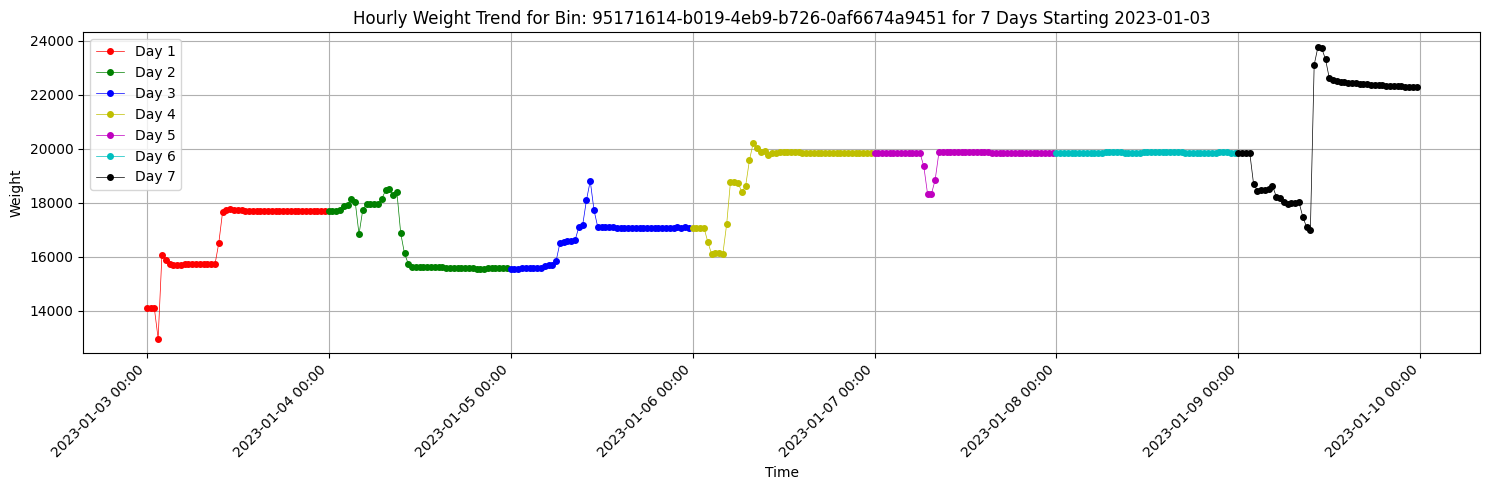

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Select a random bin 
random_bin = scale_records_clean['bin'].iloc[10]

# Define a function to filter and resample records for a given date
def get_daily_records(date):
    next_day = date + pd.Timedelta(days=1)
    one_day_records = scale_records_clean[(scale_records_clean['bin'] == random_bin) & 
                                (scale_records_clean['createdat'] >= date) & 
                                (scale_records_clean['createdat'] < next_day)]
    columns_to_include = ['weight']
    half_hour_intervals = one_day_records.set_index('createdat')[columns_to_include].resample('30T').mean()
    return half_hour_intervals

# Set the start date
start_date = pd.Timestamp('2023-01-03')
all_records = pd.concat([get_daily_records(start_date + pd.Timedelta(days=i)) for i in range(7)])

# Plotting
plt.figure(figsize=(15,5))

colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']

# Loop through each day and plot separately with different color
for i in range(7):
    daily_records = get_daily_records(start_date + pd.Timedelta(days=i))
    plt.plot(daily_records.index, daily_records['weight'], marker='o', linestyle='-', markersize=4, linewidth=0.5, label=f'Day {i+1}', color=colors[i])

plt.title(f"Hourly Weight Trend for Bin: {random_bin} for 7 Days Starting {start_date.date()}")
plt.xlabel('Time')
plt.ylabel('Weight')

# Formatting for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha='right')  # 'ha' adjusts the alignment of the datetime values

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## Error codes

- 99.27% of measurements have no error
-  0.68% of measurements are out of range
- 0.05% of measurements are unstable

In [70]:
# Check unique error codes
print(scale_records_clean['errorcode'].unique())


['NO_ERROR' 'OUT_OF_RANGE' 'UNSTABLE']


In [72]:
print(scale_records_clean['errorcode'].value_counts())
percentage_errors = scale_records_clean['errorcode'].value_counts(normalize=True) * 100
print("************************************************************************************************************************")
print(percentage_errors)

errorcode
NO_ERROR        15181858
OUT_OF_RANGE      104643
UNSTABLE            7753
Name: count, dtype: int64
************************************************************************************************************************
errorcode
NO_ERROR        99.265110
OUT_OF_RANGE     0.684198
UNSTABLE         0.050692
Name: proportion, dtype: float64


In [82]:
print(scale_records['hide'].value_counts())

hide
False    26765177
True       213947
Name: count, dtype: int64


In [83]:
percentage_errors = scale_records_clean['hide'].value_counts(normalize=True) * 100
print("************************************************************************************************************************")
print(percentage_errors)

************************************************************************************************************************
hide
False    99.267215
True      0.732785
Name: proportion, dtype: float64


## Distributions of battery levels and weight

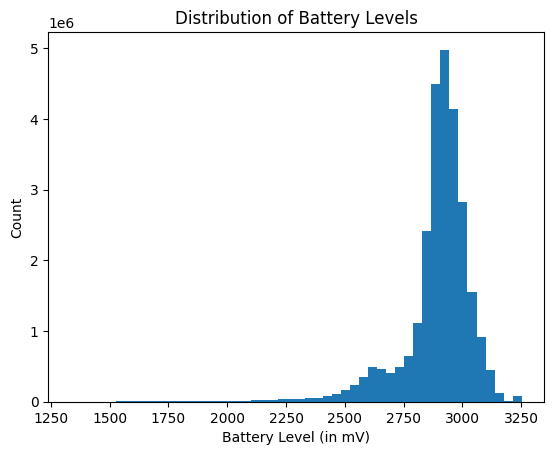

In [51]:
plt.hist(scale_records['battery'], bins=50)
plt.title('Distribution of Battery Levels')
plt.xlabel('Battery Level (in mV)')
plt.ylabel('Count')
plt.show()

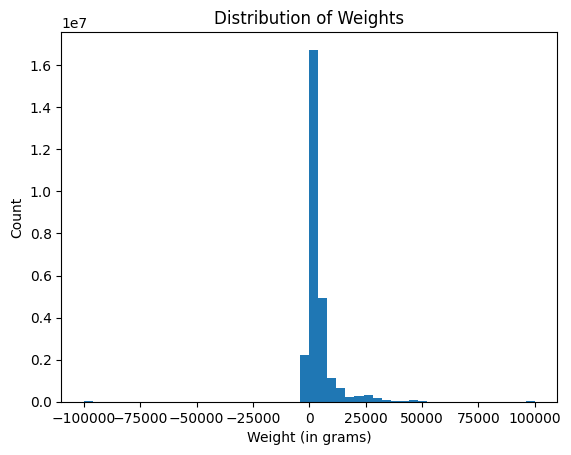

In [52]:
plt.hist(scale_records['weight'], bins=50)
plt.title('Distribution of Weights')
plt.xlabel('Weight (in grams)')
plt.ylabel('Count')
plt.show()


## Scales/bins mapping

In [67]:
unique_bins_count = scale_records_clean['iotid'].nunique()
print(f"There are {unique_bins_count} unique scales.")

unique_bins_count = scale_records_clean['bin'].nunique()
print(f"There are {unique_bins_count} unique bins.")

There are 1090 unique scales.
There are 1188 unique bins.


In [79]:
# Multiple scales to one bin

bin_iotid_counts = scale_records_clean.groupby('bin')['iotid'].nunique()
bins_with_multiple_iotids = bin_iotid_counts[bin_iotid_counts > 1]
num_bins_with_multiple_iotids = bins_with_multiple_iotids.count()

print(f"There are {num_bins_with_multiple_iotids} bins with multiple scales.")


There are 113 bins with multiple scales.


## Baseline estimation

In [29]:
import warnings

# Suppress specific FutureWarnings from Seaborn/Pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

### Example baseline estimation

/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishan/Documents/GitHub/venv-ds701/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

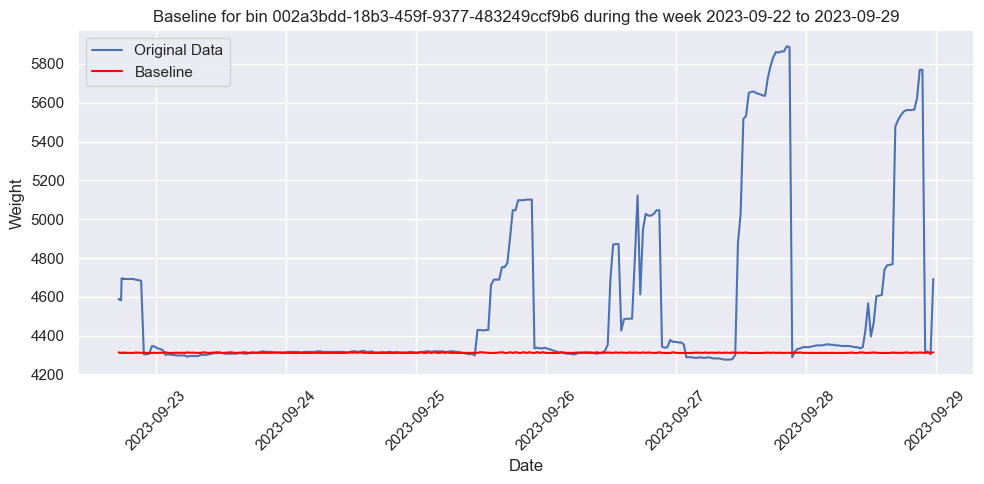

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import peakutils


# Filter the DataFrame for the specific bin
specific_bin_id = '002a3bdd-18b3-459f-9377-483249ccf9b6'
#specific_bin_id = scale_records_clean['bin'].iloc[100]
specific_bin_data = scale_records_clean[scale_records_clean['bin'] == specific_bin_id].copy()

specific_bin_data['createdat'] = pd.to_datetime(specific_bin_data['createdat'])
# Define the start and end dates
start_date = '2023-09-22'  
end_date = '2023-09-29'   

# Filter the data to include only the desired week and explicitly create a copy
week_data = specific_bin_data[(specific_bin_data['createdat'] >= start_date) & 
                              (specific_bin_data['createdat'] < end_date)].copy()

# Calculate the baseline for the specific bin's weight data
y = week_data['weight'].values
baseline_values = peakutils.baseline(y, deg=2)
#, max_it=100, tol=0.01)

# Add the baseline values to the DataFrame for plotting
week_data.loc[:, 'baseline'] = baseline_values

# Create a line plot with Seaborn
sns.set_theme(style="darkgrid")  # Set the theme for Seaborn plots

plt.figure(figsize=(10, 5))  # Set the figure size

# Plot the original data
sns.lineplot(x='createdat', y='weight', data=week_data, label='Original Data')

# Plot the baseline
sns.lineplot(x='createdat', y='baseline', data=week_data, label='Baseline', color='red')

# Customize the plot
plt.title(f'Baseline for bin {specific_bin_id} during the week {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.xticks(rotation=45)  

plt.legend()
plt.tight_layout() 
plt.show()


## Fullness assessments

In [44]:
fullness_assessments = pd.read_csv("/Users/ishan/Downloads/fullness-assessments CCDS as of Oct 13 2023.csv",parse_dates=['date'])
scale_records = pd.read_csv("/Users/ishan/Downloads/Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv",parse_dates=['createdat','updatedat'])
scale_records_clean = scale_records.drop_duplicates()

: 

In [58]:
fullness_assessments.head(5)

,bin,date,account,building,floor,stationName,binName,category,fullness
0,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-13 15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10
1,594843cf-7be5-4a8f-b6c6-c1dc1f1ee956,2023-09-13 15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BR,Mixed Recycling,20
2,65fdffd5-af50-4157-adfa-582251a1b27d,2023-09-13 15:35:37-04:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BT,Trash,10
3,a8af7a97-eb80-4b93-93b7-b517b153e133,2023-09-13 15:18:31-04:00,BU CCDS,Center for Computing & Data Sciences,01,CCBU01B,CCBU01BC,Compost,10
4,684d7454-1c8f-48cf-832f-e4823b4edfe3,2023-09-13 15:18:31-04:00,BU CCDS,Center for Computing & Data Sciences,01,CCBU01B,CCBU01BR,Mixed Recycling,50


In [59]:
scale_records_clean.head()

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00,NaN,2023,1,2
1,2023-01-02 13:02:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00,NaN,2023,1,2
2,2023-01-02 13:53:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00,NaN,2023,1,2
3,2023-01-02 16:30:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00,NaN,2023,1,2
4,2023-01-02 16:39:00,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00,NaN,2023,1,2


In [50]:
print(fullness_assessments.shape)
print(scale_records_clean.shape)

(1129, 9)
(15294254, 12)


In [38]:
print(fullness_assessments.dtypes)
print(scale_records_clean.dtypes)

bin                               object
date           datetime64[ns, UTC-04:00]
account                           object
building                          object
floor                             object
stationName                       object
binName                           object
category                          object
fullness                           int64
dtype: object
createdat     datetime64[ns]
iotid                 object
hide                    bool
bin                   object
errorcode             object
weight               float64
battery              float64
updatedat     datetime64[ns]
weightdiff           float64
year                   int64
month                  int64
day                    int64
dtype: object


### All bins in fullness assessments are in scale_records

In [74]:
# Get unique bins from fullness_assessments
unique_bins_fullness = set(fullness_assessments['bin'].unique())

# Get unique bins from scale_records_clean
unique_bins_scale_records = set(scale_records_clean['bin'].unique())

# Find the intersection of both sets
common_bins = unique_bins_fullness.intersection(unique_bins_scale_records)

# Count the number of common bins
common_bins_count = len(common_bins)

print(f"There are {common_bins_count} bins in 'fullness_assessments' that are also present in 'scale_records'.")


There are 219 bins in 'fullness_assessments' that are also present in 'scale_records'.


### Converting dates to datetime

In [39]:
print(fullness_assessments['date'].dtype)
print(scale_records_clean['createdat'].dtype)

datetime64[ns, UTC-04:00]
datetime64[ns]


In [40]:
# Convert date columns to datetime format
fullness_assessments['date'] = pd.to_datetime(fullness_assessments['date']).dt.tz_localize(None).dt.floor('T')

# Convert 'updatedat' in scale_records_clean to datetime (if it's not already) and truncate to minute
scale_records_clean['updatedat'] = pd.to_datetime(scale_records_clean['updatedat']).dt.floor('T')

/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_4007/3502987115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_records_clean['updatedat'] = pd.to_datetime(scale_records_clean['updatedat']).dt.floor('T')


In [41]:
print(fullness_assessments['date'].dtype)
print(scale_records_clean['createdat'].dtype)

datetime64[ns]
datetime64[ns]


In [42]:
import pandas as pd

# Columns to join from fullness_assessments
columns_to_join = ['account', 'building', 'floor', 'stationName', 'binName', 'category']

fullness_assessments_sorted = fullness_assessments.sort_values(by='date').drop_duplicates(subset='bin', keep='first')

# Perform the left join
merged_data_int = pd.merge(
    scale_records_clean,
    fullness_assessments_sorted[['bin'] + columns_to_join],
    on='bin',
    how='left'
)

In [43]:
merged_data_int.shape

(15294254, 18)

In [76]:
# Sort the DataFrames by the date column
fullness_assessments.sort_values(by='date', inplace=True)
scale_records_clean.sort_values(by='createdat', inplace=True)

# Perform a nearest merge
merged_data = pd.merge_asof(
    fullness_assessments,
    scale_records_clean,
    left_on='date',
    right_on='createdat',
    by='bin',
    direction='nearest'
)

# Reset index if needed and inspect the merged data
merged_data.reset_index(drop=True, inplace=True)


/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_97124/2216646925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_records_clean['updatedat'] = pd.to_datetime(scale_records_clean['updatedat']).dt.floor('T')
/var/folders/gj/nnzd_bq105s65r5x_8lb4m7c0000gn/T/ipykernel_97124/2216646925.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_records_clean.sort_values(by='createdat', inplace=True)


                                    bin                date  account  \
0  8be0c432-00b4-41ff-976b-5adf1e7670d7 2023-09-13 14:17:00  BU CCDS   
1  a6241564-5843-4d99-87d5-d7e90127ff1d 2023-09-13 14:17:00  BU CCDS   
2  d65ef7bf-3f7c-4540-b7d0-9d29d6462d93 2023-09-13 14:17:00  BU CCDS   
3  bbd90d1b-e483-41cd-8fd5-42cb301e4afa 2023-09-13 14:18:00  BU CCDS   
4  40b01406-13ea-4be3-8dda-849d6ad614e6 2023-09-13 14:18:00  BU CCDS   

                               building floor stationName   binName  \
0  Center for Computing & Data Sciences    16     CCBU16A  CCBU16AT   
1  Center for Computing & Data Sciences    16     CCBU16A  CCBU16AC   
2  Center for Computing & Data Sciences    16     CCBU16A  CCBU16AR   
3  Center for Computing & Data Sciences    16     CCBU16B  CCBU16BT   
4  Center for Computing & Data Sciences    16     CCBU16B  CCBU16BC   

          category  fullness           createdat        iotid   hide  \
0            Trash        40 2023-09-13 14:14:00  lora-000633  False

In [77]:
merged_data.shape

(1129, 20)

In [78]:
merged_data.head(10)

,bin,date,account,building,floor,stationName,binName,category,fullness,createdat,iotid,hide,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,8be0c432-00b4-41ff-976b-5adf1e7670d7,2023-09-13 14:17:00,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AT,Trash,40,2023-09-13 14:14:00,lora-000633,False,NO_ERROR,2006.561379,2902.571145,2023-09-13 14:14:00,NaN,2023,9,13
1,a6241564-5843-4d99-87d5-d7e90127ff1d,2023-09-13 14:17:00,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AC,Compost,10,2023-09-13 14:18:00,lora-000344,False,NO_ERROR,2217.135882,2880.140383,2023-09-13 14:18:00,NaN,2023,9,13
2,d65ef7bf-3f7c-4540-b7d0-9d29d6462d93,2023-09-13 14:17:00,BU CCDS,Center for Computing & Data Sciences,16,CCBU16A,CCBU16AR,Mixed Recycling,20,2023-09-13 14:21:00,lora-000602,False,NO_ERROR,2003.509575,2927.901122,2023-09-13 14:21:00,NaN,2023,9,13
3,bbd90d1b-e483-41cd-8fd5-42cb301e4afa,2023-09-13 14:18:00,BU CCDS,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BT,Trash,30,2023-09-13 14:32:00,lora-000365,False,NO_ERROR,1908.903639,2769.359884,2023-09-13 14:32:00,NaN,2023,9,13
4,40b01406-13ea-4be3-8dda-849d6ad614e6,2023-09-13 14:18:00,BU CCDS,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BC,Compost,10,2023-09-13 14:13:00,lora-000278,False,NO_ERROR,1817.349508,2863.660639,2023-09-13 14:13:00,NaN,2023,9,13
5,602d019f-890c-48c5-8c9f-57cde524bdb5,2023-09-13 14:18:00,BU CCDS,Center for Computing & Data Sciences,16,CCBU16B,CCBU16BR,Mixed Recycling,10,2023-09-13 14:13:00,lora-000302,False,NO_ERROR,1667.811093,2869.306477,2023-09-13 14:13:00,NaN,2023,9,13
6,8bae2c55-986a-486e-a869-baa128651d95,2023-09-13 14:19:00,BU CCDS,Center for Computing & Data Sciences,15,CCBU15A,CCBU15AT,Trash,20,2023-09-13 14:19:00,lora-000616,False,NO_ERROR,1951.628901,2875.715267,2023-09-13 14:19:00,NaN,2023,9,13
7,72c24bf5-88cc-42e2-ae6c-40dcb34a4224,2023-09-13 14:19:00,BU CCDS,Center for Computing & Data Sciences,15,CCBU15A,CCBU15AR,Mixed Recycling,10,2023-09-13 14:13:00,lora-000561,False,NO_ERROR,2043.183032,2885.481041,2023-09-13 14:13:00,NaN,2023,9,13
8,aad2e852-be19-4c52-988f-d030c36c589f,2023-09-13 14:19:00,BU CCDS,Center for Computing & Data Sciences,15,CCBU15A,CCBU15AC,Compost,10,2023-09-13 14:08:00,lora-000266,False,NO_ERROR,1713.588159,2911.268788,2023-09-13 14:08:00,NaN,2023,9,13
9,5f64c231-7c3b-45bc-9fcd-f70f9bcae123,2023-09-13 14:23:00,BU CCDS,Center for Computing & Data Sciences,14,CCBU14A,CCBU14AT,Trash,40,2023-09-13 14:22:00,lora-000351,False,NO_ERROR,2360.570687,2894.941634,2023-09-13 14:22:00,NaN,2023,9,13


In [79]:
merged_data[merged_data['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354']

,bin,date,account,building,floor,stationName,binName,category,fullness,createdat,iotid,hide,errorcode,weight,battery,updatedat,weightdiff,year,month,day
119,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-13 15:35:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10,2023-09-13 15:34:00,lora-000274,False,NO_ERROR,7215.991455,2878.156710,2023-09-13 15:34:00,NaN,2023,9,13
413,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-29 14:40:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,30,2023-09-29 14:30:00,lora-000274,False,NO_ERROR,7215.991455,2874.494545,2023-09-29 14:30:00,NaN,2023,9,29
641,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-05 13:21:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,30,2023-10-05 13:21:00,lora-000274,False,NO_ERROR,7133.592737,2875.410086,2023-10-05 13:21:00,NaN,2023,10,5
1002,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-12 14:19:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10,2023-10-12 14:15:00,lora-000274,False,NO_ERROR,7267.872129,2872.816052,2023-10-12 14:15:00,NaN,2023,10,12
1124,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-13 14:23:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10,2023-10-13 14:19:00,lora-000274,False,NO_ERROR,7365.529870,2872.510872,2023-10-13 14:19:00,NaN,2023,10,13


In [36]:
scale_records_clean[scale_records_clean['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354']

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
12563,2023-01-22 04:52:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3443.961242,3093.766690,2023-01-22 04:52:00,NaN,2023,1,22
15533,2023-01-24 20:01:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3682.001984,3085.221637,2023-01-24 20:01:00,NaN,2023,1,24
21428,2023-01-23 16:27:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3422.598611,3087.510491,2023-01-23 16:27:00,NaN,2023,1,23
21429,2023-01-23 17:28:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3489.738308,3090.409705,2023-01-23 17:28:00,NaN,2023,1,23
21430,2023-01-23 18:28:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3169.298848,3090.409705,2023-01-23 18:28:00,NaN,2023,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
26947554,2023-10-02 10:09:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7170.214389,2878.156710,2023-10-02 10:09:00,NaN,2023,10,2
26947555,2023-10-02 12:40:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7158.007172,2875.562676,2023-10-02 12:40:00,NaN,2023,10,2
26947556,2023-10-02 15:10:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7185.473411,2875.562676,2023-10-02 15:10:00,NaN,2023,10,2
26950469,2023-10-11 11:12:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7133.592737,2877.698939,2023-10-11 11:12:00,NaN,2023,10,11


In [28]:
fullness_assessments[fullness_assessments['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354']

,bin,date,account,building,floor,stationName,binName,category,fullness
0,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-13 15:35:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10
411,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-09-29 14:40:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,30
616,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-05 13:21:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,30
1002,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-12 14:19:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10
1122,5069cf4f-5953-411e-a764-0fad4e7b5354,2023-10-13 14:23:00,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost,10


In [ ]:
bin	date	account	building	floor	stationName	binName	category	fullness
1122	5069cf4f-5953-411e-a764-0fad4e7b5354	2023-10-13 14:23:56	BU CCDS	Center for Computing & Data Sciences	00 Lower Level	CCBU00B	CCBU00BC	Compost	10


	createdat	iotid	hide	bin	errorcode	weight	battery	updatedat	weightdiff	year	month	day
21748324	2023-10-13 14:19:00	lora-000274	False	5069cf4f-5953-411e-a764-0fad4e7b5354	NO_ERROR	7365.529870	2872.510872	2023-10-13 14:19:00	NaN	2023	10	13
19678193	2023-10-13 14:49:00	lora-000274	False	5069cf4f-5953-411e-a764-0fad4e7b5354	NO_ERROR	7368.581674	2872.510872	2023-10-13 14:49:00	NaN	2023	10	13

In [33]:
import pandas as pd

# Columns to join from fullness_assessments
columns_to_join = ['account', 'building', 'floor', 'stationName', 'binName', 'category']

fullness_assessments_sorted = fullness_assessments.sort_values(by='date').drop_duplicates(subset='bin', keep='first')

# Perform the left join
merged_data_int = pd.merge(
    scale_records_clean,
    fullness_assessments_sorted[['bin'] + columns_to_join],
    on='bin',
    how='left'
)


In [34]:
merged_data_int[merged_data_int['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354']

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,account,building,floor,stationName,binName,category
12371,2023-01-22 04:52:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3443.961242,3093.766690,2023-01-22 04:52:00,NaN,2023,1,22,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15298,2023-01-24 20:01:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3682.001984,3085.221637,2023-01-24 20:01:00,NaN,2023,1,24,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
20988,2023-01-23 16:27:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3422.598611,3087.510491,2023-01-23 16:27:00,NaN,2023,1,23,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
20989,2023-01-23 17:28:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3489.738308,3090.409705,2023-01-23 17:28:00,NaN,2023,1,23,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
20990,2023-01-23 18:28:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3169.298848,3090.409705,2023-01-23 18:28:00,NaN,2023,1,23,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288726,2023-10-02 10:09:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7170.214389,2878.156710,2023-10-02 10:09:00,NaN,2023,10,2,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15288727,2023-10-02 12:40:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7158.007172,2875.562676,2023-10-02 12:40:00,NaN,2023,10,2,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15288728,2023-10-02 15:10:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7185.473411,2875.562676,2023-10-02 15:10:00,NaN,2023,10,2,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
15291641,2023-10-11 11:12:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7133.592737,2877.698939,2023-10-11 11:12:00,NaN,2023,10,11,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost


In [21]:
merged_data_int_2 = merged_data_int.drop_duplicates()

In [22]:
merged_data_int_2.shape

(15294254, 18)

In [23]:
merged_data_int_2[merged_data_int_2['bin']=='5069cf4f-5953-411e-a764-0fad4e7b5354']

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,account,building,floor,stationName,binName,category
12887,2023-01-22 04:52:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3443.961242,3093.766690,2023-01-22 04:52:00,NaN,2023,1,22,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
16691,2023-01-24 20:01:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3682.001984,3085.221637,2023-01-24 20:01:00,NaN,2023,1,24,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
24659,2023-01-23 16:27:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3422.598611,3087.510491,2023-01-23 16:27:00,NaN,2023,1,23,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
24664,2023-01-23 17:28:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3489.738308,3090.409705,2023-01-23 17:28:00,NaN,2023,1,23,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
24669,2023-01-23 18:28:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,3169.298848,3090.409705,2023-01-23 18:28:00,NaN,2023,1,23,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27072830,2023-10-02 10:09:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7170.214389,2878.156710,2023-10-02 10:09:00,NaN,2023,10,2,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
27072835,2023-10-02 12:40:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7158.007172,2875.562676,2023-10-02 12:40:00,NaN,2023,10,2,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
27072840,2023-10-02 15:10:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7185.473411,2875.562676,2023-10-02 15:10:00,NaN,2023,10,2,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
27077873,2023-10-11 11:12:00,lora-000274,False,5069cf4f-5953-411e-a764-0fad4e7b5354,NO_ERROR,7133.592737,2877.698939,2023-10-11 11:12:00,NaN,2023,10,11,BU CCDS,Center for Computing & Data Sciences,00 Lower Level,CCBU00B,CCBU00BC,Compost
